# The Dot product

* This is an operation between 2 vectors
* The vectors need to be in the same space (i.e. have the smae number of dimensions = have the same number of elements)
* It takes in vectors but gives out a scalar number!
* It generates the projection of one vector onto the other. It tells you how parralel or orthogonal the vectors are

![dotproduct](../Images/dot_product.png)

* You calculate it by multiplying every point of one vector with the correspondiing point of the other and then summing all the products:

$dotproduct_{AB}=\sum_{i=1}^n A_iB_i$

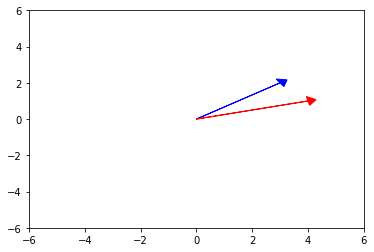

In [53]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([3,2])
B = np.array([4,1])

ax = plt.axes()
ax.arrow(0, 0, A[0], A[1], head_width=0.5, head_length=0.3, color='b')
ax.arrow(0, 0, B[0], B[1], head_width=0.5, head_length=0.3, color='r')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()


In [54]:
D = (A[0] * B[0]) + (A[1] * B[1])
print(D)

D = np.dot(A,B)
print(D)

14
14


# Convolution
* Convolution in the time domain (there is a frequency domain convolution, that is for later) is an extension of the dot product
* It is also an operation between two vectors but now the vectors do not need to be of equal dimensions and it produces another vector instead of a scalar
* When the dimensions are time points and the vectors are time series the longer vector is called the signal and the shorter the kernel
* It is practically a dot product computed repeatedly over the length of the long vector (i.e. over time for time series) 


* The short vector (the kernel) first gets fliipped
* Then it slides over the long vector (the signal)
* At each point a dot product is calculated
* The vector that is the dot products for all points is the convolution result

![convolution](../Images/Convolution.png)
![Convolution_movie](../Images/Convolution_movie.gif)


[ 1.          0.60653066  0.36787944  0.22313016  0.13533528  0.082085
  0.04978707]
-----
[ 1.          1.60653066  1.9744101   1.19754026  0.72634488  0.44055044
  0.26720735  0.13187207  0.04978707]


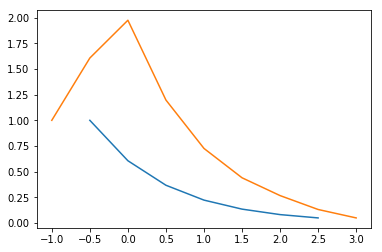

-----
[ 1.60653066  1.9744101   1.19754026  0.72634488  0.44055044  0.26720735
  0.13187207]


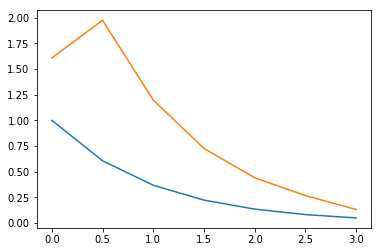

-----
[ 1.9744101   1.19754026  0.72634488  0.44055044  0.26720735]


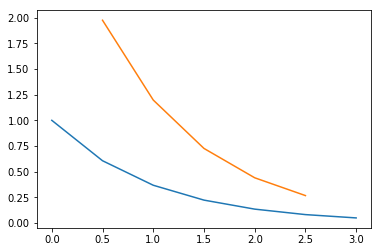

In [153]:
time = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
signal_length = len(t)
signal = 1/np.exp(time)
print(f)
print('-----')

kernel = np.array([1,1,1])
kernel_length =  len(g)

# Append zeros to the right and left of the signal so that the total length is signal_length + 2*(kernel_length - 1)
length_full_plus = signal_length + 2*(kernel_length - 1)
signal_full_plus = np.zeros(length_full_plus)
signal_full_plus[(kernel_length-1):-(kernel_length-1)] = signal

# Do the convolution manually :)
conv_full_plus = np.empty(length_full_plus)
conv_full_plus[:] = np.nan
for i in np.arange(length_full_plus - (kernel_length - 1)):
    kernel_full_plus = np.zeros(length_full_plus)
    kernel_full_plus[i:i+kernel_length] = kernel
    conv_full_plus[i+1] = np.dot(signal_full_plus, kernel_full_plus)

    
#put the points of signal_full_plus that are 0 to nan so they do not show on the graphs 
signal_full_plus = np.empty(length_full_plus)
signal_full_plus[:] = np.nan
signal_full_plus[(kernel_length-1):-(kernel_length-1)] = signal

time_plus = np.arange(-1.5,4,0.5)
print(conv_full)
ax = plt.axes()
ax.plot(time_plus, signal_full_plus, time_plus, conv_full_plus)
plt.show()
print('-----')

conv_same = conv_full_plus[kernel_length - 1: -(kernel_length - 1)]
print(conv_same)
ax2 = plt.axes()
ax2.plot(time, signal, time, conv_same)
plt.show()
print('-----')

conv_valid = np.empty(signal_length)
conv_valid[:] = np.nan
begin = int(kernel_length/2)
end = -int(kernel_length/2)
conv_valid[begin:end] = conv_full_plus[kernel_length: -(kernel_length)]
print(conv_valid[begin:end])
ax3 = plt.axes()
ax3.plot(time, signal, time, conv_valid)
plt.show()


-----
[ 1.          1.60653066  1.9744101   1.19754026  0.72634488  0.44055044
  0.26720735  0.13187207  0.04978707]
[ 1.60653066  1.9744101   1.19754026  0.72634488  0.44055044  0.26720735
  0.13187207]
[ 1.9744101   1.19754026  0.72634488  0.44055044  0.26720735]
-----


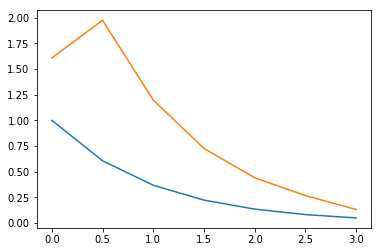

In [154]:
print('-----')
conv_full = np.convolve(signal,kernel, mode='full')
print(conv_full)
conv_same = np.convolve(signal,kernel, mode='same')
print(conv_same)
conv_valid = np.convolve(signal,kernel, mode='valid')
print(conv_valid)
print('-----')


ax = plt.axes()
ax.plot(time,signal,time,conv_same)
plt.show()

## The relationship between convolution and correlation 

[ 2.60653066  4.58094076  2.77848102  1.68523393  1.02214605  0.61996292
  0.34582913]
[ 3.31669964  2.01168002  1.22014561  0.74005572  0.44886649]


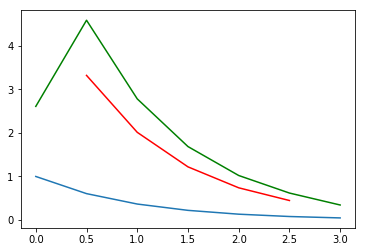

In [101]:
t = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
f = 1/np.exp(t)

g = np.array([1,2,3])

conv = np.convolve(f,g, mode='same')
print(conv)

corr = np.correlate(f,g)
print(corr)
temp = corr
corr = np.empty(7)
corr[:] = np.nan
corr[1:6] = temp

ax = plt.axes()
ax.plot(t,f)
ax.plot(t, conv, color='g')
ax.plot(t, corr, color='r')
plt.show()

[ 3.81959198  3.31669964  2.01168002  1.22014561  0.74005572  0.44886649
  0.18165914]
[ 4.58094076  2.77848102  1.68523393  1.02214605  0.61996292]


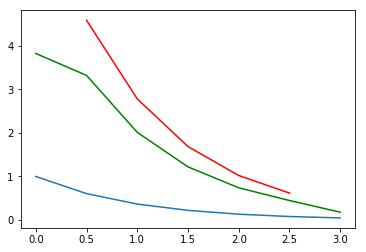

In [102]:
t = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
f = 1/np.exp(t)

g = np.array([3,2,1])

conv = np.convolve(f,g, mode='same')
print(conv)

corr = np.correlate(f,g)
print(corr)
temp = corr
corr = np.empty(7)
corr[:] = np.nan
corr[1:6] = temp

ax = plt.axes()
ax.plot(t,f)
ax.plot(t, conv, color='g')
ax.plot(t, corr, color='r')
plt.show()